In [1]:
import requests
import json
import pandas as pd

In [2]:
weather_csv = pd.read_csv('data/historical_weather/7884fd5baf822d1e34e3348e91c0cb16.csv')
df = pd.DataFrame(weather_csv)

In [3]:
from my_classes import Weather, AllWeather

In [4]:
historicalweather = AllWeather()
openinghours = [n for n in range(7, 18)]

for index in df.index:
    dt = df.loc[index, 'dt_iso'].replace(' +0000 UTC', '')
    dt = pd.to_datetime(dt)
    if dt.hour in openinghours:
        dt = pd.to_datetime(dt).strftime('%m/%d/%Y %H:%M:%S')
        temperature = df.loc[index, 'temp']
        weather_id = df.loc[index, 'weather_id']
        weather = Weather(dt, temperature, weather_id)
        historicalweather.set_item(weather)

In [5]:
from my_functions import get_accesstoken
from keys import  grant_type, client_id_1, client_id_2, client_secret_1, client_secret_2, \
    client_version, token_url, refresh_token_1, refresh_token_2, ID_HQ, ID_IFSC, ID_PSL, ID_SAS, ID_TCD

In [6]:
accesstoken = get_accesstoken(client_id_1, client_secret_1, refresh_token_1, client_version, token_url)

token = {
    'securityToken': accesstoken,
    'X-POS-MerchantId': ID_SAS
}

In [7]:
from my_functions import get_months_dates

In [8]:
month = 1
year = 2019
days_1 = get_months_dates(month, year)

month = 2
year = 2019
days_2 = get_months_dates(month, year)

days = days_1 + days_2

print(days)

['01/01/2019', '01/02/2019', '01/03/2019', '01/04/2019', '01/05/2019', '01/06/2019', '01/07/2019', '01/08/2019', '01/09/2019', '01/10/2019', '01/11/2019', '01/12/2019', '01/13/2019', '01/14/2019', '01/15/2019', '01/16/2019', '01/17/2019', '01/18/2019', '01/19/2019', '01/20/2019', '01/21/2019', '01/22/2019', '01/23/2019', '01/24/2019', '01/25/2019', '01/26/2019', '01/27/2019', '01/28/2019', '01/29/2019', '01/30/2019', '01/31/2019', '02/01/2019', '02/02/2019', '02/03/2019', '02/04/2019', '02/05/2019', '02/06/2019', '02/07/2019', '02/08/2019', '02/09/2019', '02/10/2019', '02/11/2019', '02/12/2019', '02/13/2019', '02/14/2019', '02/15/2019', '02/16/2019', '02/17/2019', '02/18/2019', '02/19/2019', '02/20/2019', '02/21/2019', '02/22/2019', '02/23/2019', '02/24/2019', '02/25/2019', '02/26/2019', '02/27/2019', '02/28/2019']


In [9]:
import datetime
import requests
from my_functions import get_summary_report

In [10]:
dailysales = {}

for day in range(0, len(days)):
    for h in range(7, 18):  
        d = pd.to_datetime(days[day]).strftime('%m/%d/%Y {}:%M:%S'.format(h))
        end = pd.to_datetime(days[day]).strftime('%m/%d/%Y {}:59:59'.format(h))
        print(d, 'to', end)
        salesdata = get_summary_report(token, d, end)
        dailysales[d] = salesdata
    
dailysales_df = pd.DataFrame(dailysales)

01/01/2019 7:00:00 to 01/01/2019 7:59:59
01/01/2019 8:00:00 to 01/01/2019 8:59:59
01/01/2019 9:00:00 to 01/01/2019 9:59:59
01/01/2019 10:00:00 to 01/01/2019 10:59:59
01/01/2019 11:00:00 to 01/01/2019 11:59:59
01/01/2019 12:00:00 to 01/01/2019 12:59:59
01/01/2019 13:00:00 to 01/01/2019 13:59:59
01/01/2019 14:00:00 to 01/01/2019 14:59:59
01/01/2019 15:00:00 to 01/01/2019 15:59:59
01/01/2019 16:00:00 to 01/01/2019 16:59:59
01/01/2019 17:00:00 to 01/01/2019 17:59:59
01/02/2019 7:00:00 to 01/02/2019 7:59:59
01/02/2019 8:00:00 to 01/02/2019 8:59:59
01/02/2019 9:00:00 to 01/02/2019 9:59:59
01/02/2019 10:00:00 to 01/02/2019 10:59:59
01/02/2019 11:00:00 to 01/02/2019 11:59:59
01/02/2019 12:00:00 to 01/02/2019 12:59:59
01/02/2019 13:00:00 to 01/02/2019 13:59:59
01/02/2019 14:00:00 to 01/02/2019 14:59:59
01/02/2019 15:00:00 to 01/02/2019 15:59:59
01/02/2019 16:00:00 to 01/02/2019 16:59:59
01/02/2019 17:00:00 to 01/02/2019 17:59:59
01/03/2019 7:00:00 to 01/03/2019 7:59:59
01/03/2019 8:00:00 to 01/

01/18/2019 14:00:00 to 01/18/2019 14:59:59
01/18/2019 15:00:00 to 01/18/2019 15:59:59
01/18/2019 16:00:00 to 01/18/2019 16:59:59
01/18/2019 17:00:00 to 01/18/2019 17:59:59
01/19/2019 7:00:00 to 01/19/2019 7:59:59
01/19/2019 8:00:00 to 01/19/2019 8:59:59
01/19/2019 9:00:00 to 01/19/2019 9:59:59
01/19/2019 10:00:00 to 01/19/2019 10:59:59
01/19/2019 11:00:00 to 01/19/2019 11:59:59
01/19/2019 12:00:00 to 01/19/2019 12:59:59
01/19/2019 13:00:00 to 01/19/2019 13:59:59
01/19/2019 14:00:00 to 01/19/2019 14:59:59
01/19/2019 15:00:00 to 01/19/2019 15:59:59
01/19/2019 16:00:00 to 01/19/2019 16:59:59
01/19/2019 17:00:00 to 01/19/2019 17:59:59
01/20/2019 7:00:00 to 01/20/2019 7:59:59
01/20/2019 8:00:00 to 01/20/2019 8:59:59
01/20/2019 9:00:00 to 01/20/2019 9:59:59
01/20/2019 10:00:00 to 01/20/2019 10:59:59
01/20/2019 11:00:00 to 01/20/2019 11:59:59
01/20/2019 12:00:00 to 01/20/2019 12:59:59
01/20/2019 13:00:00 to 01/20/2019 13:59:59
01/20/2019 14:00:00 to 01/20/2019 14:59:59
01/20/2019 15:00:00 to 

02/05/2019 9:00:00 to 02/05/2019 9:59:59
02/05/2019 10:00:00 to 02/05/2019 10:59:59
02/05/2019 11:00:00 to 02/05/2019 11:59:59
02/05/2019 12:00:00 to 02/05/2019 12:59:59
02/05/2019 13:00:00 to 02/05/2019 13:59:59
02/05/2019 14:00:00 to 02/05/2019 14:59:59
02/05/2019 15:00:00 to 02/05/2019 15:59:59
02/05/2019 16:00:00 to 02/05/2019 16:59:59
02/05/2019 17:00:00 to 02/05/2019 17:59:59
02/06/2019 7:00:00 to 02/06/2019 7:59:59
02/06/2019 8:00:00 to 02/06/2019 8:59:59
02/06/2019 9:00:00 to 02/06/2019 9:59:59
02/06/2019 10:00:00 to 02/06/2019 10:59:59
02/06/2019 11:00:00 to 02/06/2019 11:59:59
02/06/2019 12:00:00 to 02/06/2019 12:59:59
02/06/2019 13:00:00 to 02/06/2019 13:59:59
02/06/2019 14:00:00 to 02/06/2019 14:59:59
02/06/2019 15:00:00 to 02/06/2019 15:59:59
02/06/2019 16:00:00 to 02/06/2019 16:59:59
02/06/2019 17:00:00 to 02/06/2019 17:59:59
02/07/2019 7:00:00 to 02/07/2019 7:59:59
02/07/2019 8:00:00 to 02/07/2019 8:59:59
02/07/2019 9:00:00 to 02/07/2019 9:59:59
02/07/2019 10:00:00 to 02

02/22/2019 15:00:00 to 02/22/2019 15:59:59
02/22/2019 16:00:00 to 02/22/2019 16:59:59
02/22/2019 17:00:00 to 02/22/2019 17:59:59
02/23/2019 7:00:00 to 02/23/2019 7:59:59
02/23/2019 8:00:00 to 02/23/2019 8:59:59
02/23/2019 9:00:00 to 02/23/2019 9:59:59
02/23/2019 10:00:00 to 02/23/2019 10:59:59
02/23/2019 11:00:00 to 02/23/2019 11:59:59
02/23/2019 12:00:00 to 02/23/2019 12:59:59
02/23/2019 13:00:00 to 02/23/2019 13:59:59
02/23/2019 14:00:00 to 02/23/2019 14:59:59
02/23/2019 15:00:00 to 02/23/2019 15:59:59
02/23/2019 16:00:00 to 02/23/2019 16:59:59
02/23/2019 17:00:00 to 02/23/2019 17:59:59
02/24/2019 7:00:00 to 02/24/2019 7:59:59
02/24/2019 8:00:00 to 02/24/2019 8:59:59
02/24/2019 9:00:00 to 02/24/2019 9:59:59
02/24/2019 10:00:00 to 02/24/2019 10:59:59
02/24/2019 11:00:00 to 02/24/2019 11:59:59
02/24/2019 12:00:00 to 02/24/2019 12:59:59
02/24/2019 13:00:00 to 02/24/2019 13:59:59
02/24/2019 14:00:00 to 02/24/2019 14:59:59
02/24/2019 15:00:00 to 02/24/2019 15:59:59
02/24/2019 16:00:00 to 

In [11]:
from my_classes import Date

In [12]:
url = 'https://holidays.abstractapi.com/v1/'
params = {
    'api_key': '02a0112703a34f5abb1ab898b4f8125a',
    'country': 'IE',
    'year': str(year)
}

result = requests.get(url=url, params=params)
result_json = result.json()
df_holidays = pd.DataFrame(result_json)
holidays = [h for h in df_holidays['date']]

In [13]:
from my_classes import Product, AllProduct

In [14]:
products = AllProduct()

products_json = pd.read_json('data/products/products.json')
products_df = pd.DataFrame(products_json)

for index in products_df.index:
    id = products_df.loc[index, 'id']
    name = products_df.loc[index, 'name']
    category = products_df.loc[index, 'category']
    product = Product(id, name, category)
    products.set_item(product)

In [15]:
from my_classes import Sales, ProductsSales, Trainingset
from my_functions import transform_category_to_num

In [16]:
import hashlib
m = hashlib.md5()

trset = Trainingset()
dt_ = None
holiday = 0

for date in dailysales_df.columns:
    allsales = ProductsSales()
    dt_ = pd.to_datetime(date).strftime("%m/%d/%Y %H:%M:%S")
    dt = Date(dt_)
    
    # set holidays
    d = pd.to_datetime(date).strftime("%m/%d/%Y")
    if d in holidays:
        dt.holiday = 1
    trset.set_calendar(dt_, dt)
        
    weather = historicalweather.get_item(dt_)
    if weather == False:
        weather = Weather(dt_, 'null', 'null')
        historicalweather.set_item(weather)
    trset.set_weather(dt_, weather)
        
    for category in dailysales_df.index:
        categorysales = dailysales_df.loc[category, date]
            
        for itemname, soldnum in categorysales.items():
            product = products.get_item(itemname)
            
            if product == False:
                m.update(str(itemname).encode('utf-8'))
                id = str(int(m.hexdigest(), 16))[0:8]
                catnum = transform_category_to_num(category)
                product = Product(id, itemname, catnum)
                products.set_item(product)
            
            sales = Sales(soldnum, product)
            allsales.set_item(sales)
            
    trset.set_demand(dt_, allsales)

    for itemname in products.arr:
        try:
            item = trset.get_item(dt_, itemname)
        except:
            prod = products.get_item(itemname)
            weather = historicalweather.get_item(dt_)
            if weather == False:
                weather = Weather(dt_, 'null', 'null')
                historicalweather.set_item(weather)
            trset.set_weather(dt_, weather)

            sales = Sales(float(0), prod)
            allsales.set_item(sales)

In [17]:
trset.items.fillna(0)

,dayofweek,holiday,temperature,weather_id,Almond Financier,Mixed Berry Scone,Cheesecake Brownie,Pain au Chocolat,Anzac Biscuit,Snickers Boost Ball,...,Winter Toastie,Cajun Chicken Toastie,Cajun Chicken,Fruit Galette,Cajun Chicken Wrap,Pulled Pork,Vanilla Sponge Loaf,Chicken Mozzarella,Turkey Bap,Spring Wrap
datetime,,,,,,,,,,,,,,,,,,,,,
01/01/2019 07:00:00,1,1,8.91,803,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01/01/2019 08:00:00,1,1,8.61,803,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01/01/2019 09:00:00,1,1,8.27,300,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01/01/2019 10:00:00,1,1,8.14,310,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01/01/2019 11:00:00,1,1,8.98,310,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
02/28/2019 13:00:00,3,0,9.23,803,0.0,2.0,0.0,0.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02/28/2019 14:00:00,3,0,9.53,803,0.0,1.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02/28/2019 15:00:00,3,0,10.49,803,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
import os

os.remove("data/products/products.json")
products.items.to_json(r'data/products/products.json')
pd.set_option("display.max_rows", None)
products.items

,id,name,category
0,27576175,Almond Financier,1
1,82209572,Mixed Berry Scone,1
2,39010794,Cheesecake Brownie,1
3,69642563,Pain au Chocolat,1
4,84213146,Anzac Biscuit,1
5,99843227,Snickers Boost Ball,1
6,26279985,Pain au Raisin,1
7,40473678,Iced Raisin Swirl,1
8,98567899,Oatmeal & Raisin Cookie,1
9,15276357,Cinnabun,1


In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
# dataset = trset.items.values
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(trset.items.fillna(0))

In [21]:
test_size = 30
train_size = int(len(dataset) - test_size)
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
train_X, train_y = train[:, :4], train[:, 4:]
test_X, test_y = test[:, :4], test[:, 4:]
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(619, 4) (619, 81) (30, 4) (30, 81)


In [22]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1])) 
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(619, 1, 4) (619, 81) (30, 1, 4) (30, 81)


In [23]:
test_dt = list(trset.arr.keys())

In [24]:
test_dt = test_dt[-test_size:]
test_dt

['02/26/2019 10:00:00',
 '02/26/2019 11:00:00',
 '02/26/2019 12:00:00',
 '02/26/2019 13:00:00',
 '02/26/2019 14:00:00',
 '02/26/2019 15:00:00',
 '02/26/2019 16:00:00',
 '02/26/2019 17:00:00',
 '02/27/2019 07:00:00',
 '02/27/2019 08:00:00',
 '02/27/2019 09:00:00',
 '02/27/2019 10:00:00',
 '02/27/2019 11:00:00',
 '02/27/2019 12:00:00',
 '02/27/2019 13:00:00',
 '02/27/2019 14:00:00',
 '02/27/2019 15:00:00',
 '02/27/2019 16:00:00',
 '02/27/2019 17:00:00',
 '02/28/2019 07:00:00',
 '02/28/2019 08:00:00',
 '02/28/2019 09:00:00',
 '02/28/2019 10:00:00',
 '02/28/2019 11:00:00',
 '02/28/2019 12:00:00',
 '02/28/2019 13:00:00',
 '02/28/2019 14:00:00',
 '02/28/2019 15:00:00',
 '02/28/2019 16:00:00',
 '02/28/2019 17:00:00']

In [25]:
trset_cols = list(trset.items.columns)
trset_cols = trset_cols[4:]
trset_cols

['Almond Financier',
 'Mixed Berry Scone',
 'Cheesecake Brownie',
 'Pain au Chocolat',
 'Anzac Biscuit',
 'Snickers Boost Ball',
 'Pain au Raisin',
 'Iced Raisin Swirl',
 'Oatmeal & Raisin Cookie',
 'Cinnabun',
 'Sausage Roll',
 'Chicken Caesar',
 'Cruffin',
 'Wholemeal Muffin',
 'Organic Porridge',
 'Berry & Granola Parfait',
 'Granary Toast',
 'Pulled Ham & Gubeen',
 'BBLT  Bap',
 'Soup of the Day',
 'Pulled Ham',
 'Ham & Cheese Toastie',
 'Chilli Tuna Wrap',
 'Chicken & Pesto Pocket',
 'Croissant',
 'Ham Cheese Croissant',
 'Vegan Falafel Wrap',
 'BBLT',
 'Falafel Wrap',
 'Lemon Financier',
 'Reuben',
 'Christmas Pocket',
 'Blueberry Buckwheat Pot',
 'Festive Financier',
 'Sourdough Toast',
 'Coconut Snowball',
 'Custard Tart',
 'Caprese',
 'Turkey Sandwich',
 'Peanut Butter Brownie',
 'Chicken Bacon Wrap',
 'Mediterranean Vegan Wrap',
 'Cheese Croissant',
 'Chicken Serrano Roll',
 'Chicken Serrano',
 'Vegan Wrap',
 'Tuna Wrap',
 'Carrot Cake Muffin',
 'Chicken & Stuffing Bap',
 'Gr

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

/Users/MAIKO/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/MAIKO/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/MAIKO/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/MAIKO/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dty

In [27]:
model = Sequential()
model.add(LSTM(2, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(test_y.shape[1]))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(train_X, train_y, epochs=100, 
                    validation_data=(test_X, test_y), 
                    verbose=2, shuffle=False)


Train on 619 samples, validate on 30 samples
Epoch 1/100
619/619 - 3s - loss: 0.0090 - val_loss: 0.0158
Epoch 2/100
619/619 - 0s - loss: 0.0083 - val_loss: 0.0152
Epoch 3/100
619/619 - 0s - loss: 0.0080 - val_loss: 0.0149
Epoch 4/100
619/619 - 0s - loss: 0.0078 - val_loss: 0.0147
Epoch 5/100
619/619 - 0s - loss: 0.0077 - val_loss: 0.0147
Epoch 6/100
619/619 - 0s - loss: 0.0076 - val_loss: 0.0146
Epoch 7/100
619/619 - 0s - loss: 0.0076 - val_loss: 0.0146
Epoch 8/100
619/619 - 0s - loss: 0.0076 - val_loss: 0.0146
Epoch 9/100
619/619 - 0s - loss: 0.0076 - val_loss: 0.0146
Epoch 10/100
619/619 - 0s - loss: 0.0076 - val_loss: 0.0146
Epoch 11/100
619/619 - 0s - loss: 0.0076 - val_loss: 0.0146
Epoch 12/100
619/619 - 0s - loss: 0.0076 - val_loss: 0.0146
Epoch 13/100
619/619 - 0s - loss: 0.0076 - val_loss: 0.0146
Epoch 14/100
619/619 - 0s - loss: 0.0076 - val_loss: 0.0146
Epoch 15/100
619/619 - 0s - loss: 0.0076 - val_loss: 0.0146
Epoch 16/100
619/619 - 0s - loss: 0.0076 - val_loss: 0.0146
Epoc

In [28]:
import matplotlib.pyplot as plt

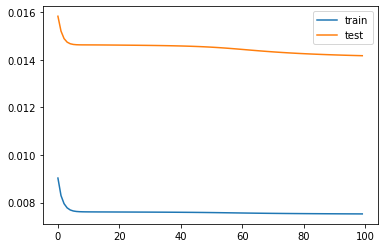

In [29]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [30]:
#prediction on training and testing data
train_predict = model.predict(train_X)    
test_predict = model.predict(test_X)       

#converting from three dimension to two dimension
train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

In [31]:
from numpy import concatenate

In [32]:
inv_train_predict = concatenate((train_X, train_predict), axis=1)
inv_test_predict = concatenate((test_X, test_predict), axis=1)

#transforming to original scale
inv_train_predict = scaler.inverse_transform(inv_train_predict)
inv_test_predict = scaler.inverse_transform(inv_test_predict)

In [33]:
inv_train_predict = inv_train_predict[:, 4:]
inv_train_predict

array([[ 2.76199967e-01,  1.65967852e+00,  6.80820085e-05, ...,
        -1.08360546e-05, -1.80982519e-04, -3.19196377e-04],
       [ 2.76150227e-01,  1.66251218e+00,  7.43796118e-05, ...,
        -1.17213349e-05, -1.71553809e-04, -3.25748231e-04],
       [ 3.01547945e-01,  1.57435906e+00,  1.35249877e-03, ...,
        -1.00219579e-04,  2.10039550e-03, -1.14126212e-03],
       ...,
       [ 2.69656688e-01,  1.74911535e+00, -4.05036844e-05, ...,
        -1.45806989e-05, -4.18297481e-04, -3.13435216e-04],
       [ 2.69776076e-01,  1.73983473e+00, -6.38202764e-05, ...,
        -1.14696741e-05, -4.53858171e-04, -2.90117459e-04],
       [ 2.71110386e-01,  1.66546172e+00, -2.27347016e-04, ...,
         1.16254669e-05, -6.98240474e-04, -1.19383913e-04]])

In [34]:
inv_test_predict = inv_test_predict[:, 4:]
inv_test_predict 

array([[ 2.72248089e-01,  1.61663908e+00, -3.18516977e-04, ...,
         2.55128252e-05, -8.30512494e-04, -1.84921082e-05],
       [ 2.73598254e-01,  1.56533271e+00, -4.04768158e-04, ...,
         3.93543451e-05, -9.52880830e-04,  8.09230842e-05],
       [ 2.74719834e-01,  1.52601904e+00, -4.65482008e-04, ...,
         4.95372515e-05, -1.03729032e-03,  1.53382774e-04],
       ...,
       [ 2.81820059e-01,  1.55194670e+00,  5.91003336e-05, ...,
         4.67812060e-06, -1.38379168e-04, -2.29475787e-04],
       [ 2.81294107e-01,  1.56620318e+00,  7.37467781e-05, ...,
         1.56569877e-06, -1.20596495e-04, -2.50654761e-04],
       [ 3.02556366e-01,  1.48782089e+00,  1.12859276e-03, ...,
        -7.06993014e-05,  1.75751094e-03, -9.19344602e-04]])

In [35]:
import numpy as np

In [36]:
df_train = pd.DataFrame(train)
df_test = pd.DataFrame(test)

In [37]:
#scaling back the original train labels
train_y = train_y.reshape((len(train_y), train_y.shape[1]))
inv_train_y = concatenate((train_X, train_y), axis=1)
inv_train_y = scaler.inverse_transform(inv_train_y)
inv_train_y = inv_train_y[:,4:]

In [38]:
#scaling back the original test labels
test_y = test_y.reshape((len(test_y), test_y.shape[1]))
inv_test_y = concatenate((test_X, test_y), axis=1)
inv_test_y = scaler.inverse_transform(inv_test_y)
inv_test_y = inv_test_y[:,4:]

In [39]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [40]:
#calculating rmse on train data
rmse_train = sqrt(mean_squared_error(inv_train_y, inv_train_predict))
print('Test RMSE: %.3f' % rmse_train)

Test RMSE: 0.406


In [41]:
#calculating rmse on test data
rmse_test = sqrt(mean_squared_error(inv_test_y, inv_test_predict))
print('Test RMSE: %.3f' % rmse_test)

Test RMSE: 0.463


In [42]:
test_y = pd.DataFrame(inv_test_y, index=test_dt)
test_y.columns = trset_cols
test_y

,Almond Financier,Mixed Berry Scone,Cheesecake Brownie,Pain au Chocolat,Anzac Biscuit,Snickers Boost Ball,Pain au Raisin,Iced Raisin Swirl,Oatmeal & Raisin Cookie,Cinnabun,...,Winter Toastie,Cajun Chicken Toastie,Cajun Chicken,Fruit Galette,Cajun Chicken Wrap,Pulled Pork,Vanilla Sponge Loaf,Chicken Mozzarella,Turkey Bap,Spring Wrap
02/26/2019 10:00:00,0.0,2.0,0.0,4.0,2.0,1.0,3.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02/26/2019 11:00:00,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02/26/2019 12:00:00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02/26/2019 13:00:00,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02/26/2019 14:00:00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02/26/2019 15:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02/26/2019 16:00:00,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02/26/2019 17:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02/27/2019 07:00:00,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02/27/2019 08:00:00,0.0,7.0,0.0,3.0,2.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
def sum_total_daily_sales(dataframe):
    arr = {}
    for index in dataframe.index:
        for itemname in dataframe.columns:
            dt = str(pd.to_datetime(index).date())
            if dt not in arr:
                arr[dt] = {}
            try:
                arr[dt][itemname] = arr[dt][itemname] + dataframe.loc[index, itemname]
            except:
                arr[dt][itemname] = dataframe.loc[index, itemname]
    return arr

In [44]:
dailysales_y = sum_total_daily_sales(test_y)

In [45]:
dailysales_y_df = pd.DataFrame(dailysales_y)

In [46]:
dailysales_y_df

,2019-02-26,2019-02-27,2019-02-28
Almond Financier,0.0,0.0,0.0
Mixed Berry Scone,6.0,14.0,25.0
Cheesecake Brownie,0.0,0.0,0.0
Pain au Chocolat,5.0,6.0,3.0
Anzac Biscuit,4.0,7.0,10.0
Snickers Boost Ball,6.0,5.0,8.0
Pain au Raisin,3.0,4.0,5.0
Iced Raisin Swirl,0.0,0.0,0.0
Oatmeal & Raisin Cookie,4.0,6.0,7.0
Cinnabun,8.0,6.0,8.0


In [47]:
test_predict = pd.DataFrame(inv_test_predict, index=test_dt)
test_predict.columns = trset_cols
test_predict

,Almond Financier,Mixed Berry Scone,Cheesecake Brownie,Pain au Chocolat,Anzac Biscuit,Snickers Boost Ball,Pain au Raisin,Iced Raisin Swirl,Oatmeal & Raisin Cookie,Cinnabun,...,Winter Toastie,Cajun Chicken Toastie,Cajun Chicken,Fruit Galette,Cajun Chicken Wrap,Pulled Pork,Vanilla Sponge Loaf,Chicken Mozzarella,Turkey Bap,Spring Wrap
02/26/2019 10:00:00,0.272248,1.616639,-0.000319,0.298263,0.649011,0.618226,0.404634,0.000014,0.519616,0.553197,...,-0.000005,-0.000062,0.001335,-1.642176e-06,-0.000323,-0.000025,-0.002313,2.551283e-05,-0.000831,-0.000018
02/26/2019 11:00:00,0.273598,1.565333,-0.000405,0.240197,0.606591,0.697864,0.320671,0.000029,0.545461,0.513658,...,-0.000075,0.000096,0.001488,-3.776691e-06,-0.000083,-0.000049,-0.002579,3.935435e-05,-0.000953,0.000081
02/26/2019 12:00:00,0.274720,1.526019,-0.000465,0.196083,0.574371,0.758214,0.256750,0.000040,0.564956,0.483476,...,-0.000127,0.000214,0.001594,-5.351518e-06,0.000095,-0.000066,-0.002763,4.953725e-05,-0.001037,0.000153
02/26/2019 13:00:00,0.274890,1.520257,-0.000474,0.189643,0.569667,0.767016,0.247408,0.000042,0.567793,0.479060,...,-0.000135,0.000231,0.001609,-5.578346e-06,0.000121,-0.000068,-0.002789,5.100193e-05,-0.001049,0.000164
02/26/2019 14:00:00,0.275208,1.509602,-0.000490,0.177750,0.560981,0.783261,0.230153,0.000045,0.573025,0.470898,...,-0.000149,0.000262,0.001636,-5.995145e-06,0.000168,-0.000073,-0.002835,5.369200e-05,-0.001070,0.000183
02/26/2019 15:00:00,0.275390,1.504414,-0.000496,0.172076,0.556839,0.790964,0.221879,0.000046,0.575477,0.466959,...,-0.000155,0.000276,0.001645,-6.179293e-06,0.000189,-0.000075,-0.002852,5.487085e-05,-0.001078,0.000191
02/26/2019 16:00:00,0.274876,1.521620,-0.000470,0.191282,0.570866,0.764728,0.249745,0.000042,0.567027,0.480139,...,-0.000132,0.000226,0.001602,-5.506099e-06,0.000113,-0.000067,-0.002777,5.052597e-05,-0.001043,0.000160
02/26/2019 17:00:00,0.274260,1.542857,-0.000438,0.215065,0.588237,0.732210,0.284224,0.000036,0.556534,0.496429,...,-0.000105,0.000163,0.001546,-4.662925e-06,0.000018,-0.000058,-0.002680,4.507773e-05,-0.000999,0.000121
02/27/2019 07:00:00,0.277252,1.702623,0.000275,0.427274,0.743784,0.428638,0.580100,-0.000050,0.450456,0.628986,...,0.000254,-0.000621,0.000138,7.010287e-06,-0.001240,0.000076,-0.000248,-3.303832e-05,0.000156,-0.000496
02/27/2019 08:00:00,0.277113,1.714752,0.000307,0.441787,0.754399,0.408420,0.600810,-0.000054,0.443706,0.638569,...,0.000274,-0.000665,0.000078,7.640669e-06,-0.001309,0.000083,-0.000145,-3.718663e-05,0.000204,-0.000527


In [48]:
dailysales_predict = sum_total_daily_sales(test_predict)

In [49]:
dailysales_predict

{'2019-02-26': {'Almond Financier': 2.1951905488967896,
  'Mixed Berry Scone': 12.306740641593933,
  'Cheesecake Brownie': -0.003556495998054743,
  'Pain au Chocolat': 1.6803589165210724,
  'Anzac Biscuit': 4.676562875509262,
  'Snickers Boost Ball': 5.912482216954231,
  'Pain au Raisin': 2.21546483784914,
  'Iced Raisin Swirl': 0.0002939524711109698,
  'Oatmeal & Raisin Cookie': 4.469887800514698,
  'Cinnabun': 3.9438168704509735,
  'Sausage Roll': 3.7751274183392525,
  'Chicken Caesar': 0.022166579961776733,
  'Cruffin': -0.021030651405453682,
  'Wholemeal Muffin': 1.5536446608603,
  'Organic Porridge': -0.24950243532657623,
  'Berry & Granola Parfait': 1.0456758700311184,
  'Granary Toast': -0.022019049152731895,
  'Pulled Ham & Gubeen': 0.00688202865421772,
  'BBLT  Bap': -0.0002127446496160701,
  'Soup of the Day': 1.243114449083805,
  'Pulled Ham': -0.007391705177724361,
  'Ham & Cheese Toastie': 2.1591863930225372,
  'Chilli Tuna Wrap': 0.389410175383091,
  'Chicken & Pesto Pock

In [50]:
import math

In [51]:
for date, contents in dailysales_predict.items():
    for name, sales in contents.items():
        sales_roundup = math.ceil(dailysales_predict[date][name])
        dailysales_predict[date][name] = float(sales_roundup)
# #         print(math.ceil(sales))

In [52]:
dailysales_predict_df = pd.DataFrame(dailysales_predict)

In [53]:
dailysales_predict_df

,2019-02-26,2019-02-27,2019-02-28
Almond Financier,3.0,4.0,4.0
Mixed Berry Scone,13.0,18.0,18.0
Cheesecake Brownie,0.0,0.0,1.0
Pain au Chocolat,2.0,4.0,4.0
Anzac Biscuit,5.0,8.0,8.0
Snickers Boost Ball,6.0,7.0,7.0
Pain au Raisin,3.0,5.0,5.0
Iced Raisin Swirl,1.0,0.0,0.0
Oatmeal & Raisin Cookie,5.0,6.0,6.0
Cinnabun,4.0,7.0,6.0


In [54]:
difference = dailysales_predict_df.sub(dailysales_y_df, fill_value=0)
difference

,2019-02-26,2019-02-27,2019-02-28
Almond Financier,3.0,4.000000e+00,4.0
Mixed Berry Scone,7.0,4.000000e+00,-7.0
Cheesecake Brownie,0.0,0.000000e+00,1.0
Pain au Chocolat,-3.0,-2.000000e+00,1.0
Anzac Biscuit,1.0,1.000000e+00,-2.0
Snickers Boost Ball,0.0,2.000000e+00,-1.0
Pain au Raisin,0.0,1.000000e+00,0.0
Iced Raisin Swirl,1.0,0.000000e+00,0.0
Oatmeal & Raisin Cookie,1.0,0.000000e+00,-1.0
Cinnabun,-4.0,1.000000e+00,-2.0


In [55]:
difference.to_csv(r'data/differences/two_month_trainingset_{}_{}.csv'.format(month, year), index=False)

In [56]:
os.system('say "your program has finished"')

0